In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df2019=pd.read_csv('listings2019.csv')
df2020=pd.read_csv('listings2020.csv')

In [3]:
df2019.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.44195    9.17797     Private room   
1                  NaN       NAVIGLI  45.44991    9.17597  Entire home/apt   
2                  NaN         SARPI  45.47814    9.17294     Private room   
3                  NaN   VIALE MONZA  45.51988    9.22310  Entire home/apt   
4                  NaN   VIALE MONZA  45.51942    9.22615  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    100               4                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.14   
2    200               1                  8  2015-10-25               0.09   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.26   

   calculated_host_listings_count  availability_365  
0                               1               358  
1                               1               325  
2                               1               362  
3                               5               242  
4                               5               293

In [4]:
df2020.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  17232         MPX-Center-EXPO Value/Money    66856       Simone   
2  23986     " Characteristic Milanese flat"    95941       Jeremy   
3  28300             nice flat near the park   121663        Marta   
4  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.44195    9.17797     Private room   
1                  NaN        BOVISA  45.50465    9.16087      Shared room   
2                  NaN       NAVIGLI  45.44991    9.17597  Entire home/apt   
3                  NaN         SARPI  45.47814    9.17294     Private room   
4                  NaN   VIALE MONZA  45.51988    9.22310  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    100               4                 12  2019-04-13               0.10   
1     24               2                 55  2018-10-21               0.45   
2    150               1                 14  2019-09-02               0.14   
3    200               1                 26  2019-10-16               0.27   
4     75               3                 15  2018-07-01               0.12   

   calculated_host_listings_count  availability_365  
0                               1               358  
1                               1               179  
2                               1               363  
3                               1               365  
4                               4               243

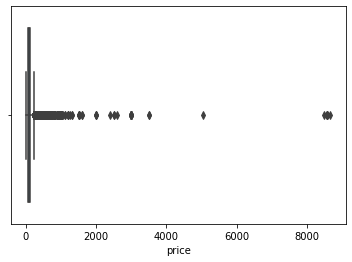

In [5]:
import seaborn as sns
sns.boxplot(x=df2019['price'])

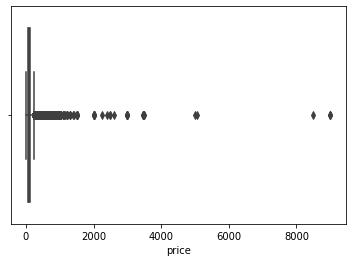

In [6]:
sns.boxplot(x=df2020['price'])

In [7]:
df2019['price'].describe()

count    20626.000000
mean       117.571027
std        220.599283
min          0.000000
25%         53.000000
50%         79.000000
75%        125.000000
max       8668.000000
Name: price, dtype: float64

In [8]:
df2020['price'].describe()

count    19728.000000
mean       121.012824
std        207.497873
min          0.000000
25%         55.000000
50%         80.000000
75%        124.000000
max       9000.000000
Name: price, dtype: float64

# Observation:

1) Both datasets contain columns that have missing data. Especially, column 'neighbourhood_group' doesn't have any data at all.

2) The first 4 columns 'id', 'name', 'host_name','host_id' only contains identifiers which don't relate to the price column. The 'last_review' column just indicates the date of the last review which doesn't relate to the price column either.

3) From 2019 to 2020, number of listings Airbnb decreases about 1000 items.

4) Even though Covid-19 is happening, the 2020 Airbnb price is still higher than 2019. In detail, the price mean in 2019 is only 117.57 USD, the price mean in 2020 is 121.01 USD. The maximum price in 2019 is 8668.00 USD, whereas the maximum price in 2020 9000 USD.

5) There are outliers in 'price' attribute

# Preprocessing data

In [9]:
# from scipy import stats
# z_scores2019 = stats.zscore(df2019)
# abs_z_scores = np.abs(z_scores2019)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df2019 = df2019[filtered_entries]

# z_scores2020 = stats.zscore(df2020)
# abs_z_scores = np.abs(z_scores2020)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df2020 = df2020[filtered_entries]

### drop unnecessary columns

In [10]:
df2019 = df2019.drop(columns=['neighbourhood_group','name','host_name','last_review','id','host_id'])

In [11]:
df2020 = df2020.drop(columns=['neighbourhood_group','name','host_name','last_review','id','host_id'])

### convert all non-numeric data to numeric data.

In [12]:
df2019['neighbourhood'] = df2019['neighbourhood'].astype('category')
df2019['room_type'] = df2019['room_type'].astype('category')

In [13]:
df2020['neighbourhood'] = df2020['neighbourhood'].astype('category')
df2020['room_type'] = df2020['room_type'].astype('category')

In [14]:
dict(zip(df2019.neighbourhood.cat.codes, df2019.neighbourhood))

{73: 'TIBALDI',
 42: 'NAVIGLI',
 69: 'SARPI',
 80: 'VIALE MONZA',
 31: 'GUASTALLA',
 74: 'TICINESE',
 2: 'BAGGIO',
 10: 'BUENOS AIRES - VENEZIA',
 27: 'GIAMBELLINO',
 12: 'CENTRALE',
 84: 'XXII MARZO',
 8: 'BRERA',
 19: 'DUOMO',
 32: 'ISOLA',
 3: 'BANDE NERE',
 83: 'WASHINGTON',
 55: 'PORTA ROMANA',
 33: 'LAMBRATE',
 71: 'SELINUNTE',
 82: 'VILLAPIZZONE',
 37: 'MACIACHINI - MAGGIOLINA',
 14: "CITTA' STUDI",
 0: 'ADRIANO',
 72: 'STADERA',
 67: 'S. SIRO',
 66: 'S. CRISTOFORO',
 51: 'PARCO LAMBRO - CIMIANO',
 45: 'PADOVA',
 16: 'CORSICA',
 44: 'ORTOMERCATO',
 63: 'ROGOREDO',
 36: 'LORETO',
 17: 'DE ANGELI - MONTE ROSA',
 6: 'BOVISA',
 81: 'VIGENTINA',
 26: 'GHISOLFA',
 7: 'BOVISASCA',
 75: 'TORTONA',
 35: 'LORENTEGGIO',
 79: 'UMBRIA - MOLISE',
 29: 'GRATOSOGLIO - TICINELLO',
 25: 'GARIBALDI REPUBBLICA',
 38: 'MAGENTA - S. VITTORE',
 56: 'PORTELLO',
 68: 'SACCO',
 46: 'PAGANO',
 50: 'PARCO FORLANINI - ORTICA',
 34: 'LODI - CORVETTO',
 76: 'TRE TORRI',
 62: 'RIPAMONTI',
 23: 'FORZE ARMATE',


In [15]:
dict(zip(df2019.room_type.cat.codes, df2019.room_type))

{1: 'Private room', 0: 'Entire home/apt', 2: 'Shared room'}

In [16]:
dict(zip(df2020.neighbourhood.cat.codes, df2020.neighbourhood))

{74: 'TIBALDI',
 6: 'BOVISA',
 42: 'NAVIGLI',
 70: 'SARPI',
 81: 'VIALE MONZA',
 31: 'GUASTALLA',
 75: 'TICINESE',
 2: 'BAGGIO',
 10: 'BUENOS AIRES - VENEZIA',
 25: 'GARIBALDI REPUBBLICA',
 12: 'CENTRALE',
 85: 'XXII MARZO',
 8: 'BRERA',
 19: 'DUOMO',
 32: 'ISOLA',
 3: 'BANDE NERE',
 84: 'WASHINGTON',
 56: 'PORTA ROMANA',
 33: 'LAMBRATE',
 83: 'VILLAPIZZONE',
 37: 'MACIACHINI - MAGGIOLINA',
 14: "CITTA' STUDI",
 51: 'PARCO FORLANINI - ORTICA',
 0: 'ADRIANO',
 73: 'STADERA',
 67: 'S. CRISTOFORO',
 52: 'PARCO LAMBRO - CIMIANO',
 27: 'GIAMBELLINO',
 45: 'PADOVA',
 44: 'ORTOMERCATO',
 36: 'LORETO',
 17: 'DE ANGELI - MONTE ROSA',
 82: 'VIGENTINA',
 26: 'GHISOLFA',
 7: 'BOVISASCA',
 76: 'TORTONA',
 35: 'LORENTEGGIO',
 80: 'UMBRIA - MOLISE',
 29: 'GRATOSOGLIO - TICINELLO',
 38: 'MAGENTA - S. VITTORE',
 63: 'RIPAMONTI',
 57: 'PORTELLO',
 69: 'SACCO',
 34: 'LODI - CORVETTO',
 46: 'PAGANO',
 23: 'FORZE ARMATE',
 4: 'BARONA',
 21: 'FARINI',
 71: 'SCALO ROMANA',
 16: 'CORSICA',
 30: 'GRECO',
 24: 

In [17]:
dict(zip(df2020.room_type.cat.codes, df2020.room_type))

{2: 'Private room', 3: 'Shared room', 0: 'Entire home/apt', 1: 'Hotel room'}

In [18]:
category_columns = df2019.select_dtypes(['category']).columns
df2019[category_columns] = df2019[category_columns].apply(lambda x: x.cat.codes)

In [19]:
category_columns = df2020.select_dtypes(['category']).columns
df2020[category_columns] = df2020[category_columns].apply(lambda x: x.cat.codes)

In [20]:
df2019.head()

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             73  45.44195    9.17797          1    100               4   
1             42  45.44991    9.17597          0    150               1   
2             69  45.47814    9.17294          1    200               1   
3             80  45.51988    9.22310          0     70               3   
4             80  45.51942    9.22615          0     70               3   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 11               0.10                               1   
1                 12               0.14                               1   
2                  8               0.09                               1   
3                 15               0.14                               5   
4                 28               0.26                               5   

   availability_365  
0               358  
1               325  
2               362  
3               242  
4               293

In [21]:
df2020.head()

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             74  45.44195    9.17797          2    100               4   
1              6  45.50465    9.16087          3     24               2   
2             42  45.44991    9.17597          0    150               1   
3             70  45.47814    9.17294          2    200               1   
4             81  45.51988    9.22310          0     75               3   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 12               0.10                               1   
1                 55               0.45                               1   
2                 14               0.14                               1   
3                 26               0.27                               1   
4                 15               0.12                               4   

   availability_365  
0               358  
1               179  
2               363  
3               365  
4               243

### Fill missing Values
Printing the column name and total missing values for that column, iteratively.

In [22]:
df2019.apply(lambda x: x.isnull().sum())

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [23]:
df2020.apply(lambda x: x.isnull().sum())


neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4296
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [24]:
df2019['reviews_per_month'] = df2019['reviews_per_month'].fillna(df2019['reviews_per_month'].mean())
df2020['reviews_per_month'] = df2020['reviews_per_month'].fillna(df2020['reviews_per_month'].mean())

In [25]:
df2019.apply(lambda x: x.isnull().sum())

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
df2020.apply(lambda x: x.isnull().sum())

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
df2019.head()

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             73  45.44195    9.17797          1    100               4   
1             42  45.44991    9.17597          0    150               1   
2             69  45.47814    9.17294          1    200               1   
3             80  45.51988    9.22310          0     70               3   
4             80  45.51942    9.22615          0     70               3   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 11               0.10                               1   
1                 12               0.14                               1   
2                  8               0.09                               1   
3                 15               0.14                               5   
4                 28               0.26                               5   

   availability_365  
0               358  
1               325  
2               362  
3               242  
4               293

In [28]:
df2020.head()

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             74  45.44195    9.17797          2    100               4   
1              6  45.50465    9.16087          3     24               2   
2             42  45.44991    9.17597          0    150               1   
3             70  45.47814    9.17294          2    200               1   
4             81  45.51988    9.22310          0     75               3   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 12               0.10                               1   
1                 55               0.45                               1   
2                 14               0.14                               1   
3                 26               0.27                               1   
4                 15               0.12                               4   

   availability_365  
0               358  
1               179  
2               363  
3               365  
4               243

In [29]:
df2019.corr()

neighbourhood  latitude  longitude  room_type  \
neighbourhood                        1.000000 -0.314640  -0.160590   0.009976   
latitude                            -0.314640  1.000000   0.142488   0.035579   
longitude                           -0.160590  0.142488   1.000000   0.014577   
room_type                            0.009976  0.035579   0.014577   1.000000   
price                               -0.037313 -0.036373  -0.006856  -0.109502   
minimum_nights                       0.011654 -0.001150   0.004541  -0.004101   
number_of_reviews                   -0.049000  0.021874   0.017827  -0.039461   
reviews_per_month                   -0.063440  0.037404   0.041035  -0.050400   
calculated_host_listings_count      -0.052528  0.005774  -0.005217  -0.113666   
availability_365                    -0.023555 -0.001666  -0.017252  -0.044401   

                                   price  minimum_nights  number_of_reviews  \
neighbourhood                  -0.037313        0.011654          -0.049000   
latitude                       -0.036373       -0.001150           0.021874   
longitude                      -0.006856        0.004541           0.017827   
room_type                      -0.109502       -0.004101          -0.039461   
price                           1.000000       -0.001235          -0.083056   
minimum_nights                 -0.001235        1.000000           0.006694   
number_of_reviews              -0.083056        0.006694           1.000000   
reviews_per_month              -0.051105        0.000355           0.663471   
calculated_host_listings_count  0.058201       -0.001273          -0.041554   
availability_365                0.026667       -0.003548           0.087744   

                                reviews_per_month  \
neighbourhood                           -0.063440   
latitude                                 0.037404   
longitude                                0.041035   
room_type                               -0.050400   
price                                   -0.051105   
minimum_nights                           0.000355   
number_of_reviews                        0.663471   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.013853   
availability_365                        -0.001566   

                                calculated_host_listings_count  \
neighbourhood                                        -0.052528   
latitude                                              0.005774   
longitude                                            -0.005217   
room_type                                            -0.113666   
price                                                 0.058201   
minimum_nights                                       -0.001273   
number_of_reviews                                    -0.041554   
reviews_per_month                                    -0.013853   
calculated_host_listings_count                        1.000000   
availability_365                                      0.055810   

                                availability_365  
neighbourhood                          -0.023555  
latitude                               -0.001666  
longitude                              -0.017252  
room_type                              -0.044401  
price                                   0.026667  
minimum_nights                         -0.003548  
number_of_reviews                       0.087744  
reviews_per_month                      -0.001566  
calculated_host_listings_count          0.055810  
availability_365                        1.000000

In [30]:
df2020.corr()

neighbourhood  latitude  longitude  room_type  \
neighbourhood                        1.000000 -0.318904  -0.156605   0.008783   
latitude                            -0.318904  1.000000   0.126514   0.028731   
longitude                           -0.156605  0.126514   1.000000   0.014633   
room_type                            0.008783  0.028731   0.014633   1.000000   
price                               -0.034424 -0.024209  -0.007483  -0.104974   
minimum_nights                       0.001521  0.011550  -0.017046  -0.014800   
number_of_reviews                   -0.041626  0.017637   0.016070  -0.039126   
reviews_per_month                   -0.065135  0.039110   0.038566  -0.064011   
calculated_host_listings_count      -0.055917  0.007511  -0.011749  -0.136743   
availability_365                    -0.031839  0.001883  -0.005625  -0.060019   

                                   price  minimum_nights  number_of_reviews  \
neighbourhood                  -0.034424        0.001521          -0.041626   
latitude                       -0.024209        0.011550           0.017637   
longitude                      -0.007483       -0.017046           0.016070   
room_type                      -0.104974       -0.014800          -0.039126   
price                           1.000000       -0.006299          -0.087804   
minimum_nights                 -0.006299        1.000000          -0.028751   
number_of_reviews              -0.087804       -0.028751           1.000000   
reviews_per_month              -0.056899       -0.038978           0.765622   
calculated_host_listings_count  0.054579        0.041749          -0.074958   
availability_365                0.029708        0.015045           0.096168   

                                reviews_per_month  \
neighbourhood                           -0.065135   
latitude                                 0.039110   
longitude                                0.038566   
room_type                               -0.064011   
price                                   -0.056899   
minimum_nights                          -0.038978   
number_of_reviews                        0.765622   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.050314   
availability_365                         0.048266   

                                calculated_host_listings_count  \
neighbourhood                                        -0.055917   
latitude                                              0.007511   
longitude                                            -0.011749   
room_type                                            -0.136743   
price                                                 0.054579   
minimum_nights                                        0.041749   
number_of_reviews                                    -0.074958   
reviews_per_month                                    -0.050314   
calculated_host_listings_count                        1.000000   
availability_365                                      0.043662   

                                availability_365  
neighbourhood                          -0.031839  
latitude                                0.001883  
longitude                              -0.005625  
room_type                              -0.060019  
price                                   0.029708  
minimum_nights                          0.015045  
number_of_reviews                       0.096168  
reviews_per_month                       0.048266  
calculated_host_listings_count          0.043662  
availability_365                        1.000000

### remove outliers

In [31]:
from scipy import stats
z_scores2019 = stats.zscore(df2019)
abs_z_scores = np.abs(z_scores2019)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df2019 = df2019[filtered_entries]

z_scores2020 = stats.zscore(df2020)
abs_z_scores = np.abs(z_scores2020)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df2020 = df2020[filtered_entries]

In [32]:
df2019['price'].describe()

count    18928.000000
mean       108.305790
std         91.327907
min          0.000000
25%         55.000000
50%         80.000000
75%        125.000000
max        750.000000
Name: price, dtype: float64

In [33]:
df2020['price'].describe()

count    17980.000000
mean       105.714683
std         89.702083
min          0.000000
25%         54.000000
50%         79.000000
75%        120.000000
max        730.000000
Name: price, dtype: float64

In [34]:
df2019.var()

neighbourhood                       680.003113
latitude                              0.000410
longitude                             0.000839
room_type                             0.190046
price                              8340.786606
minimum_nights                      342.060143
number_of_reviews                   809.666839
reviews_per_month                     1.136274
calculated_host_listings_count      162.927044
availability_365                  18106.634315
dtype: float64

In [35]:
df2020.var()

neighbourhood                       696.928285
latitude                              0.000420
longitude                             0.000839
room_type                             0.826111
price                              8046.463781
minimum_nights                       25.873772
number_of_reviews                  1165.560652
reviews_per_month                     0.934719
calculated_host_listings_count      271.640623
availability_365                  19375.789895
dtype: float64

#### Because variances of attributes in both datasets are so much diffent, we need to scale data

### scaling variables

In [36]:
X2019 = pd.DataFrame(scale(df2019), index=df2019.index, columns=df2019.columns)

In [37]:
X2020 = pd.DataFrame(scale(df2020), index=df2020.index, columns=df2020.columns)

In [38]:
X2019.head()

neighbourhood  latitude  longitude  room_type     price  minimum_nights  \
0       1.230203 -1.433254  -0.334908   1.708699 -0.090947        0.028258   
1       0.041378 -1.040072  -0.403952  -0.585241  0.456545       -0.133954   
2       1.076806  0.354340  -0.508553   1.708699  1.004037       -0.133954   
3       1.498647  2.416075   1.223068  -0.585241 -0.419442       -0.025813   
4       1.498647  2.393353   1.328360  -0.585241 -0.419442       -0.025813   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          -0.170994          -1.004377                       -0.343097   
1          -0.135849          -0.966851                       -0.343097   
2          -0.276427          -1.013758                       -0.343097   
3          -0.030415          -0.966851                       -0.029715   
4           0.426464          -0.854273                       -0.029715   

   availability_365  
0          1.491531  
1          1.246282  
2          1.521258  
3          0.629445  
4          1.008465

In [39]:
X2020.head()

neighbourhood  latitude  longitude  room_type     price  minimum_nights  \
0       1.246064 -1.426061  -0.349259   1.613359 -0.063709        0.209250   
1      -1.329823  1.632881  -0.939561   2.713613 -0.910982       -0.183948   
2       0.033882 -1.037717  -0.418300  -0.587149  0.493707       -0.380548   
3       1.094542  0.339539  -0.522897   1.613359  1.051123       -0.380548   
4       1.511229  2.375906   1.208657  -0.587149 -0.342417        0.012651   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          -0.231605          -0.902905                       -0.317488   
1           1.027938          -0.540879                       -0.317488   
2          -0.173021          -0.861530                       -0.317488   
3           0.178479          -0.727064                       -0.317488   
4          -0.143730          -0.882218                       -0.135461   

   availability_365  
0          1.475250  
1          0.189266  
2          1.511171  
3          1.525540  
4          0.649059

# Using Principle Component Analysis (PCA) to visualize data

In [40]:
PCA().fit(X2019).components_.T

array([[-0.24063772,  0.5852212 , -0.11125095,  0.04557608, -0.00293716,
        -0.18207775,  0.20791016, -0.27692785,  0.65648297, -0.03330431],
       [ 0.22354996, -0.5739568 , -0.07048396,  0.05285439,  0.0635261 ,
         0.20560436, -0.31496715, -0.35295406,  0.58428284, -0.03689719],
       [ 0.16608318, -0.42893806, -0.05167699, -0.13309875, -0.07547271,
        -0.41233658,  0.76376504,  0.00879318,  0.0893091 , -0.03057259],
       [-0.05044445, -0.06747799, -0.63934184,  0.2561177 , -0.13065449,
         0.05724185, -0.04312905,  0.66667858,  0.2234831 , -0.04399379],
       [-0.24190239, -0.06568831,  0.47383076, -0.47289989,  0.06592569,
         0.33029913,  0.09921181,  0.47899335,  0.33802511, -0.14844555],
       [-0.06847823, -0.03811219,  0.0941485 ,  0.46627305,  0.82511599,
         0.14886674,  0.24373416,  0.0706732 , -0.00939239,  0.01080457],
       [ 0.63680521,  0.27224777,  0.01286855,  0.0070847 ,  0.02598189,
         0.12394475,  0.058482  ,  0.04045859

In [41]:
PCA().fit(X2020).components_.T

array([[-1.41024617e-01, -6.20660859e-01, -5.87828795e-02,
         1.58046705e-01,  5.23653478e-02, -2.22854053e-01,
         1.13844641e-01, -2.25098903e-01,  6.71128310e-01,
        -2.92953951e-03],
       [ 1.29718154e-01,  6.05154776e-01, -4.44613491e-02,
         1.44570728e-02,  1.10331193e-02,  4.02876732e-01,
         1.80972930e-01, -2.38523794e-01,  6.01714385e-01,
        -2.52722351e-02],
       [ 9.94112415e-02,  4.31670654e-01, -5.62841117e-02,
        -4.86028400e-02,  9.70825493e-02, -8.78965078e-01,
        -2.31971015e-03, -7.02657165e-03,  1.25107762e-01,
        -2.31598536e-02],
       [-4.96427738e-02,  7.06396786e-02, -5.36369982e-01,
         3.98761810e-01, -1.83097393e-01,  4.59202700e-02,
        -3.36682735e-01,  5.97064125e-01,  2.00905056e-01,
        -2.21170807e-03],
       [-2.13973868e-01, -1.17486086e-02,  3.81378746e-01,
        -6.10791884e-01, -3.74089941e-02,  2.06111044e-02,
        -9.70694992e-02,  5.53964515e-01,  3.33093714e-01,
        -8.

In [42]:
pca_loadings2019 = pd.DataFrame(PCA().fit(X2019).components_.T, index=df2019.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10'])


In [43]:
pca_loadings2020 = pd.DataFrame(PCA().fit(X2020).components_.T, index=df2020.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10'])


In [44]:
pca2019 = PCA()
df_plot2019 = pd.DataFrame(pca2019.fit_transform(X2019), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=X2019.index)
df_plot2019.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.394102  1.344757 -0.912273  1.370457 -1.150151  0.581101  0.958196   
1 -1.007105  0.591118  0.832922  0.284587 -0.782955  0.823124  0.572530   
2 -1.311266  0.207445 -0.501298  0.904641 -1.103917  1.386418  0.303067   
3 -0.066642 -1.187375 -0.098977  0.566502 -0.366594 -0.143456  0.681807   
4  0.330829 -1.060368  0.026854  0.741359 -0.543030  0.039134  0.913694   

        PC8       PC9      PC10  
0  0.912820  0.136280 -0.310048  
1 -0.160145 -0.751238 -0.304855  
2  0.828871  1.437009 -0.456787  
3 -2.074076  2.097947 -0.602614  
4 -2.033893  2.123393 -0.791416

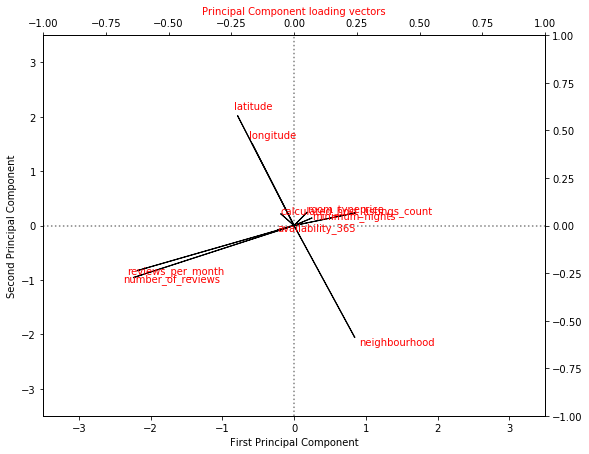

In [45]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
# for i in df_plot.index:ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings2019[['V1', 'V2']].index:ax2.annotate(i, (-pca_loadings2019.V1.loc[i]*a, -pca_loadings2019.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings2019.V1[0], -pca_loadings2019.V2[0])
ax2.arrow(0,0,-pca_loadings2019.V1[1], -pca_loadings2019.V2[1])
ax2.arrow(0,0,-pca_loadings2019.V1[2], -pca_loadings2019.V2[2])
ax2.arrow(0,0,-pca_loadings2019.V1[3], -pca_loadings2019.V2[3])
ax2.arrow(0,0,-pca_loadings2019.V1[4], -pca_loadings2019.V2[4])
ax2.arrow(0,0,-pca_loadings2019.V1[5], -pca_loadings2019.V2[5])
ax2.arrow(0,0,-pca_loadings2019.V1[6], -pca_loadings2019.V2[6])
ax2.arrow(0,0,-pca_loadings2019.V1[7], -pca_loadings2019.V2[7])
ax2.arrow(0,0,-pca_loadings2019.V1[8], -pca_loadings2019.V2[8])
ax2.arrow(0,0,-pca_loadings2019.V1[9], -pca_loadings2019.V2[9])
# ax2.arrow(0,0,-pca_loadings.V1[10], -pca_loadings.V2[10])
# # ax2.arrow(0,0,-pca_loadings.V1[11], -pca_loadings.V2[11])
# # ax2.arrow(0,0,-pca_loadings.V1[12], -pca_loadings.V2[12])
# # ax2.arrow(0,0,-pca_loadings.V1[13], -pca_loadings.V2[13])
# # ax2.arrow(0,0,-pca_loadings.V1[14], -pca_loadings.V2[14])
# # ax2.arrow(0,0,-pca_loadings.V1[15], -pca_loadings.V2[15])
# # ax2.arrow(0,0,-pca_loadings.V1[16], -pca_loadings.V2[16])

#### In 2019 dataset
1) 'latitude', 'longtitude' and 'neighbourhood' don't correlate with 'price' attribute.

2) 'reviews_per_month', 'number_of_reviews', 'minimum_nights' are negative correlated with 'price' attribute.

3) 'calculated_host_listings_count', and 'room_type' are postive correlated with 'price' attribute.

In [46]:
pca2020 = PCA()
df_plot2020 = pd.DataFrame(pca2020.fit_transform(X2020), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=X2020.index)
df_plot2020.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.124092 -1.496140 -0.620973  1.190546 -1.655301 -0.656684  0.068265   
1  0.759649  1.477160 -1.896996  1.396367 -0.921769  1.865985 -0.423958   
2 -0.752167 -0.762035  0.629325 -0.505724 -1.591404 -0.261968  0.395952   
3 -0.639974 -0.556002 -0.403923  0.240349 -1.940023  0.265836 -0.022793   
4 -0.305572  1.124573 -0.054509  0.301353 -0.362030 -0.565048  1.138311   

        PC8       PC9      PC10  
0  0.970735  0.126061 -0.256837  
1  1.071175  0.167529 -1.018072  
2 -0.065767 -0.691534 -0.322672  
3  1.060649  1.487048 -0.563105  
4 -1.582256  2.266469 -0.502002

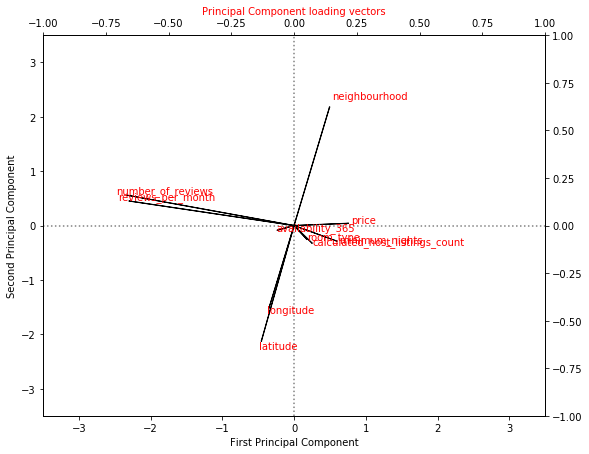

In [47]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
# for i in df_plot.index:ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings2020[['V1', 'V2']].index:ax2.annotate(i, (-pca_loadings2020.V1.loc[i]*a, -pca_loadings2020.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings2020.V1[0], -pca_loadings2020.V2[0])
ax2.arrow(0,0,-pca_loadings2020.V1[1], -pca_loadings2020.V2[1])
ax2.arrow(0,0,-pca_loadings2020.V1[2], -pca_loadings2020.V2[2])
ax2.arrow(0,0,-pca_loadings2020.V1[3], -pca_loadings2020.V2[3])
ax2.arrow(0,0,-pca_loadings2020.V1[4], -pca_loadings2020.V2[4])
ax2.arrow(0,0,-pca_loadings2020.V1[5], -pca_loadings2020.V2[5])
ax2.arrow(0,0,-pca_loadings2020.V1[6], -pca_loadings2020.V2[6])
ax2.arrow(0,0,-pca_loadings2020.V1[7], -pca_loadings2020.V2[7])
ax2.arrow(0,0,-pca_loadings2020.V1[8], -pca_loadings2020.V2[8])
ax2.arrow(0,0,-pca_loadings2020.V1[9], -pca_loadings2020.V2[9])
# ax2.arrow(0,0,-pca_loadings.V1[10], -pca_loadings.V2[10])
# # ax2.arrow(0,0,-pca_loadings.V1[11], -pca_loadings.V2[11])
# # ax2.arrow(0,0,-pca_loadings.V1[12], -pca_loadings.V2[12])
# # ax2.arrow(0,0,-pca_loadings.V1[13], -pca_loadings.V2[13])
# # ax2.arrow(0,0,-pca_loadings.V1[14], -pca_loadings.V2[14])
# # ax2.arrow(0,0,-pca_loadings.V1[15], -pca_loadings.V2[15])
# # ax2.arrow(0,0,-pca_loadings.V1[16], -pca_loadings.V2[16])

#### In 2020 dataset
1) 'latitude', 'longtitude' and 'neighbourhood' don't correlate with 'price' attribute.

2) 'reviews_per_month', 'number_of_reviews','minimum_nights' are negative correlated with 'price' attribute.

3) 'calculated_host_listings_count' and 'room_type' are postive correlated with 'price' attribute.

([<matplotlib.axis.XTick at 0x7fc54a24ef90>,
 <a list of 10 Text xticklabel objects>)

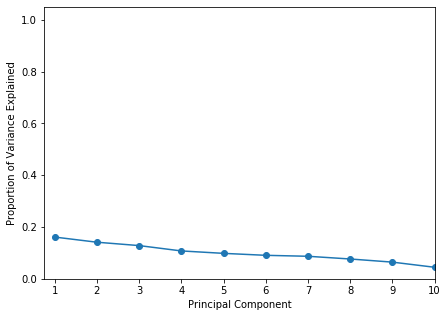

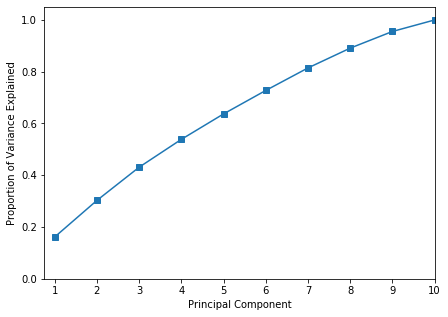

In [48]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], pca2019.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], np.cumsum(pca2019.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10])


#### In 2019 dataset

The first 2 PC explains variance in data the most and the first 2 PCs explains about 30% of the variance of 2019 data

([<matplotlib.axis.XTick at 0x7fc54a2a6910>,
 <a list of 10 Text xticklabel objects>)

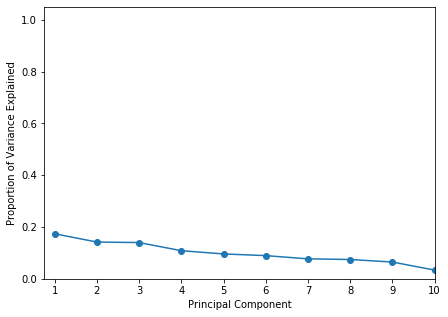

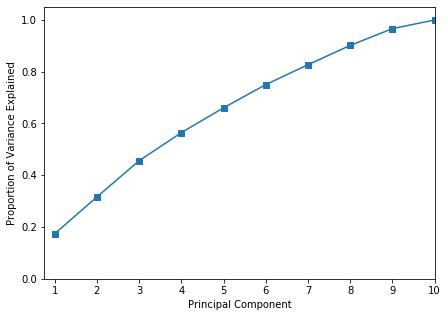

In [49]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], pca2020.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], np.cumsum(pca2020.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

#### In 2020 dataset

The first 2 PC explains variance in data the most and the first 2 PCs explains about 30% of the variance of 2020 data

# Using OLS to write linear regression models for dataset in 2019 and 2020



In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm

### In 2019 and 2020 datasets, 'review_per_month', 'number_of_reviews', 'calculated_host_listings_count' and 'room_type' attributes are correlated with 'price', so we choose those 4 attributes as independent variables for the model and 'price' is the dependent variable.

In [51]:
X2019 = df2019[['reviews_per_month','number_of_reviews','calculated_host_listings_count','room_type','minimum_nights']]
Y2019 = df2019['price']

In [52]:
model2019 = smf.ols('Y2019~X2019',data=df2019).fit()

In [53]:
model2019.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y2019   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     280.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          5.19e-290
Time:                        23:50:07   Log-Likelihood:            -1.1163e+05
No. Observations:               18928   AIC:                         2.233e+05
Df Residuals:                   18922   BIC:                         2.233e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.5234      1.097    117.168      0.000     126.373     130.673
X2019[0]       0.8629      0.709      1.217      0.224      -0.527       2.253
X2019[1]      -0.5879      0.027    -22.158      0.000      -0.640      -0.536
X2019[2]      -0.1378      0.051     -2.715      0.007      -0.237      -0.038
X2019[3]     -42.7610      1.487    -28.750      0.000     -45.676     -39.846
X2019[4]      -0.0720      0.035     -2.076      0.038      -0.140      -0.004
==============================================================================
Omnibus:                    11190.068   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107903.796
Skew:                           2.750   Prob(JB):                         0.00
Kurtosis:                      13.323   Cond. No.                         82.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explaination
X2019[0] which is the coefficient of 'reviews_per_month' attribute has p-value = 0.224 which is higher than 0.05, so we cannot reject the null hypothesis of this coefficient which means the true value of this coefficient can be 0.

Model:
price = 128.5234 + 0.8629*reviews_per_month - 0.5879*number_of_review -0.1378*calculated_host_listings_count -42.7610*room_type - 0.0720*minimum_nights

In [54]:
X2020 = df2020[['reviews_per_month','number_of_reviews','calculated_host_listings_count','room_type','minimum_nights']]
Y2020 = df2020['price']

In [55]:
model2020 = smf.ols('Y2020~X2020',data=df2020).fit()

In [56]:
model2020.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y2020   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     287.4
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          7.92e-297
Time:                        23:50:07   Log-Likelihood:            -1.0567e+05
No. Observations:               17980   AIC:                         2.113e+05
Df Residuals:                   17974   BIC:                         2.114e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.0331      1.135    110.164      0.000     122.808     127.258
X2020[0]       0.7544      0.883      0.855      0.393      -0.976       2.485
X2020[1]      -0.4534      0.025    -18.178      0.000      -0.502      -0.404
X2020[2]       0.2122      0.040      5.265      0.000       0.133       0.291
X2020[3]     -21.4978      0.719    -29.915      0.000     -22.906     -20.089
X2020[4]      -0.2989      0.130     -2.295      0.022      -0.554      -0.044
==============================================================================
Omnibus:                    10787.835   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105964.359
Skew:                           2.798   Prob(JB):                         0.00
Kurtosis:                      13.494   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explaination
X2020[0] which is the coefficient of 'reviews_per_month' attribute has p-value = 0.393 which is higher than 0.05, so we cannot reject the null hypothesis of this coefficient which means the true value of this coefficient can be 0.

Model:
price = 125.0331 + 0.7544*reviews_per_month - 0.4534*number_of_review + 0.2122*calculated_host_listings_count -21.4978*room_type - 0.2989*minimum_nights

# Compare two models

### Model 2019: 

price = 128.5234 + 0.8629*reviews_per_month - 0.5879*number_of_review -0.1378*calculated_host_listings_count -42.7610*room_type - 0.0720*minimum_nights

### Model 2020: 

price = 125.0331 + 0.7544*reviews_per_month - 0.4534*number_of_review + 0.2122*calculated_host_listings_count -21.4978*room_type - 0.2989*minimum_nights

1) The price of 2019 starts at 128.52 USD and the price of 2020 starts at 125.03 USD

2) For reviews_per_month attribute, in 2019, 1 unit goes up in this attribute raises the price 0.86 USD. In 2020, 1 unit goes up only raises the price 0.75 USD.

3) For number_of_reviews attribute, in 2019, 1 unit goes up in this attribuute decreases the price 0.59 USD. In 2020, 1 unit goes up decreases the price 0.45 USD.

4) For calculated_host_listings_count attribute, between 2019 and 2020, this attribute has an obvious change. In particular, in 2019, 1 unit goes up in this attribute decreases the price 0.13 USD. However, in 2020, 1 unit goes up raises the price 0.21 USD.

5) With room_type attribute, between 2019 and 2020, this attribute a significacant change in number. In 2019, 1 unit goes up in this attribute decreases the price up too 42.76 USD. However, in 2020, 1 unit goes up decreases only 21.50 USD.

6) With minimum_nights attribute, in 2019, 1 unit goes up decreases the price 0.07 USD and in 2020 1 unit goes up decreases the price 0.3 USD.

## Conclusion:

Even though Covid-19 is happening, it seems not to affect the Airbnb market in Milan much. The price of Airbnb market seems to stay the same from 2019 to 2020.

# Part 2: predict Airbnb price in 2020

In [57]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [58]:
df2020 = pd.read_csv('listings2020.csv')

In [59]:
df2020

id                                              name    host_id  \
0          6400                                  The Studio Milan      13822   
1         17232                       MPX-Center-EXPO Value/Money      66856   
2         23986                   " Characteristic Milanese flat"      95941   
3         28300                           nice flat near the park     121663   
4         32119                Nico & Cynthia's Easy Yellow Suite     138683   
...         ...                                               ...        ...   
19723  43293183                    Stanza in appartamento moderno   23236402   
19724  43297925                                          My House  344777081   
19725  43301091                              Casa da Suite Storia   14743308   
19726  43305619  Bicocca - Bella camera in appartamento condiviso    3154455   
19727  43306248        Your nest is Milan - City center apartment  344846731   

         host_name  neighbourhood_group      neighbourhood  latitude  \
0        Francesca                  NaN            TIBALDI  45.44195   
1           Simone                  NaN             BOVISA  45.50465   
2           Jeremy                  NaN            NAVIGLI  45.44991   
3            Marta                  NaN              SARPI  45.47814   
4      Nico&Cinzia                  NaN        VIALE MONZA  45.51988   
...            ...                  ...                ...       ...   
19723        Dario                  NaN          RIPAMONTI  45.43537   
19724     Leonardo                  NaN  EX OM - MORIVIONE  45.43996   
19725       Jacopo                  NaN            DERGANO  45.49945   
19726       Monica                  NaN            BICOCCA  45.51819   
19727       Marina                  NaN         WASHINGTON  45.46471   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17797     Private room    100               4                 12   
1        9.16087      Shared room     24               2                 55   
2        9.17597  Entire home/apt    150               1                 14   
3        9.17294     Private room    200               1                 26   
4        9.22310  Entire home/apt     75               3                 15   
...          ...              ...    ...             ...                ...   
19723    9.20075     Private room     24               2                  0   
19724    9.19801     Private room     38               2                  0   
19725    9.18468  Entire home/apt     64               1                  0   
19726    9.20755     Private room     31               2                  0   
19727    9.16124  Entire home/apt     78               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.10                               1   
1      2018-10-21               0.45                               1   
2      2019-09-02               0.14                               1   
3      2019-10-16               0.27                               1   
4      2018-07-01               0.12                               4   
...           ...                ...                             ...   
19723         NaN                NaN                               2   
19724         NaN                NaN                               1   
19725         NaN                NaN                              59   
19726         NaN                NaN                               5   
19727         NaN                NaN                               1   

       availability_365  
0                   358  
1                   179  
2                   363  
3                   365  
4                   243  
...                 ...  
19723               336  
19724                85  
19725               365  
19726               335  
19727               365  

[19728 rows x 16 columns]

In [60]:
df2020 = df2020.drop(columns=['neighbourhood_group','name','host_name','last_review','id','host_id'])

In [61]:
df2020['neighbourhood'] = df2020['neighbourhood'].astype('category')
df2020['room_type'] = df2020['room_type'].astype('category')

In [62]:
dict(zip(df2020.neighbourhood.cat.codes, df2020.neighbourhood))

{74: 'TIBALDI',
 6: 'BOVISA',
 42: 'NAVIGLI',
 70: 'SARPI',
 81: 'VIALE MONZA',
 31: 'GUASTALLA',
 75: 'TICINESE',
 2: 'BAGGIO',
 10: 'BUENOS AIRES - VENEZIA',
 25: 'GARIBALDI REPUBBLICA',
 12: 'CENTRALE',
 85: 'XXII MARZO',
 8: 'BRERA',
 19: 'DUOMO',
 32: 'ISOLA',
 3: 'BANDE NERE',
 84: 'WASHINGTON',
 56: 'PORTA ROMANA',
 33: 'LAMBRATE',
 83: 'VILLAPIZZONE',
 37: 'MACIACHINI - MAGGIOLINA',
 14: "CITTA' STUDI",
 51: 'PARCO FORLANINI - ORTICA',
 0: 'ADRIANO',
 73: 'STADERA',
 67: 'S. CRISTOFORO',
 52: 'PARCO LAMBRO - CIMIANO',
 27: 'GIAMBELLINO',
 45: 'PADOVA',
 44: 'ORTOMERCATO',
 36: 'LORETO',
 17: 'DE ANGELI - MONTE ROSA',
 82: 'VIGENTINA',
 26: 'GHISOLFA',
 7: 'BOVISASCA',
 76: 'TORTONA',
 35: 'LORENTEGGIO',
 80: 'UMBRIA - MOLISE',
 29: 'GRATOSOGLIO - TICINELLO',
 38: 'MAGENTA - S. VITTORE',
 63: 'RIPAMONTI',
 57: 'PORTELLO',
 69: 'SACCO',
 34: 'LODI - CORVETTO',
 46: 'PAGANO',
 23: 'FORZE ARMATE',
 4: 'BARONA',
 21: 'FARINI',
 71: 'SCALO ROMANA',
 16: 'CORSICA',
 30: 'GRECO',
 24: 

In [63]:
dict(zip(df2020.room_type.cat.codes, df2020.room_type))

{2: 'Private room', 3: 'Shared room', 0: 'Entire home/apt', 1: 'Hotel room'}

In [64]:
category_columns = df2020.select_dtypes(['category']).columns
df2020[category_columns] = df2020[category_columns].apply(lambda x: x.cat.codes)

In [65]:
df2020

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0                 74  45.44195    9.17797          2    100               4   
1                  6  45.50465    9.16087          3     24               2   
2                 42  45.44991    9.17597          0    150               1   
3                 70  45.47814    9.17294          2    200               1   
4                 81  45.51988    9.22310          0     75               3   
...              ...       ...        ...        ...    ...             ...   
19723             63  45.43537    9.20075          2     24               2   
19724             20  45.43996    9.19801          2     38               2   
19725             18  45.49945    9.18468          0     64               1   
19726              5  45.51819    9.20755          2     31               2   
19727             84  45.46471    9.16124          0     78               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     12               0.10                               1   
1                     55               0.45                               1   
2                     14               0.14                               1   
3                     26               0.27                               1   
4                     15               0.12                               4   
...                  ...                ...                             ...   
19723                  0                NaN                               2   
19724                  0                NaN                               1   
19725                  0                NaN                              59   
19726                  0                NaN                               5   
19727                  0                NaN                               1   

       availability_365  
0                   358  
1                   179  
2                   363  
3                   365  
4                   243  
...                 ...  
19723               336  
19724                85  
19725               365  
19726               335  
19727               365  

[19728 rows x 10 columns]

In [66]:
df2020.apply(lambda x: x.isnull().sum())

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4296
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [67]:
df2020['reviews_per_month'] = df2020['reviews_per_month'].fillna(df2020['reviews_per_month'].mean())

In [68]:
df2020.apply(lambda x: x.isnull().sum())

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [69]:
from scipy import stats

z_scores2020 = stats.zscore(df2020)
abs_z_scores = np.abs(z_scores2020)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df2020 = df2020[filtered_entries]

In [70]:
df2020.var()

neighbourhood                       696.928285
latitude                              0.000420
longitude                             0.000839
room_type                             0.826111
price                              8046.463781
minimum_nights                       25.873772
number_of_reviews                  1165.560652
reviews_per_month                     0.934719
calculated_host_listings_count      271.640623
availability_365                  19375.789895
dtype: float64

In [71]:
feature_cols = ['neighbourhood', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count']

X2020 = pd.DataFrame(scale(df2020), index=df2020.index, columns=df2020.columns)

y2020 = df2020['price']

In [72]:
X2020

neighbourhood  latitude  longitude  room_type     price  \
0           1.246064 -1.426061  -0.349259   1.613359 -0.063709   
1          -1.329823  1.632881  -0.939561   2.713613 -0.910982   
2           0.033882 -1.037717  -0.418300  -0.587149  0.493707   
3           1.094542  0.339539  -0.522897   1.613359  1.051123   
4           1.511229  2.375906   1.208657  -0.587149 -0.342417   
...              ...       ...        ...        ...       ...   
19723       0.829377 -1.747080   0.437121   1.613359 -0.910982   
19724      -0.799494 -1.523147   0.342534   1.613359 -0.754905   
19725      -0.875255  1.379189  -0.117625  -0.587149 -0.465049   
19726      -1.367704  2.293456   0.671861   1.613359 -0.832943   
19727       1.624871 -0.315670  -0.926788  -0.587149 -0.308972   

       minimum_nights  number_of_reviews  reviews_per_month  \
0            0.209250          -0.231605          -0.902905   
1           -0.183948           1.027938          -0.540879   
2           -0.380548          -0.173021          -0.861530   
3           -0.380548           0.178479          -0.727064   
4            0.012651          -0.143730          -0.882218   
...               ...                ...                ...   
19723       -0.183948          -0.583105           0.195455   
19724       -0.183948          -0.583105           0.195455   
19725       -0.380548          -0.583105           0.195455   
19726       -0.183948          -0.583105           0.195455   
19727       -0.380548          -0.583105           0.195455   

       calculated_host_listings_count  availability_365  
0                           -0.317488          1.475250  
1                           -0.317488          0.189266  
2                           -0.317488          1.511171  
3                           -0.317488          1.525540  
4                           -0.135461          0.649059  
...                               ...               ...  
19723                       -0.256812          1.317196  
19724                       -0.317488         -0.486055  
19725                        3.201702          1.525540  
19726                       -0.074785          1.310012  
19727                       -0.317488          1.525540  

[17980 rows x 10 columns]

In [73]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X2020, y2020, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14384, 10) (14384,)
(3596, 10) (3596,)


In [74]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

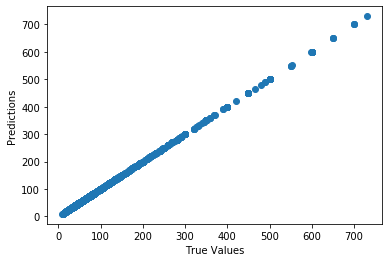

In [75]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [76]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "img/1.png")
#Visual Representation of Train/Test Split and Cross Validation. H/t to my DSI instructor, Joseph Nelson!

In [77]:
Image(url= "img/2.png")
#Visual representation of K-Folds. Again, H/t to Joseph Nelson!

In [78]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
df2020

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0                 74  45.44195    9.17797          2    100               4   
1                  6  45.50465    9.16087          3     24               2   
2                 42  45.44991    9.17597          0    150               1   
3                 70  45.47814    9.17294          2    200               1   
4                 81  45.51988    9.22310          0     75               3   
...              ...       ...        ...        ...    ...             ...   
19723             63  45.43537    9.20075          2     24               2   
19724             20  45.43996    9.19801          2     38               2   
19725             18  45.49945    9.18468          0     64               1   
19726              5  45.51819    9.20755          2     31               2   
19727             84  45.46471    9.16124          0     78               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     12           0.100000                               1   
1                     55           0.450000                               1   
2                     14           0.140000                               1   
3                     26           0.270000                               1   
4                     15           0.120000                               4   
...                  ...                ...                             ...   
19723                  0           1.161874                               2   
19724                  0           1.161874                               1   
19725                  0           1.161874                              59   
19726                  0           1.161874                               5   
19727                  0           1.161874                               1   

       availability_365  
0                   358  
1                   179  
2                   363  
3                   365  
4                   243  
...                 ...  
19723               336  
19724                85  
19725               365  
19726               335  
19727               365  

[17980 rows x 10 columns]

In [79]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df2020, y2020, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [1. 1. 1. 1. 1.]


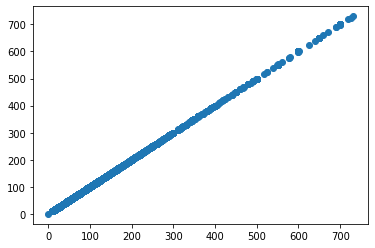

In [80]:
# Make cross validated predictions
predictions = cross_val_predict(model, df2020, y2020, cv=5)
plt.scatter(y2020, predictions)

In [81]:
accuracy = metrics.r2_score(y2020, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 1.0


#### DECISION TREE ####

In [82]:
# Import modules
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [83]:
print("Here's the dimensions of our data frame:\n", df2020.shape)
print("Here's the data types of our columns:\n", df2020.dtypes)

Here's the dimensions of our data frame:
 (17980, 10)
Here's the data types of our columns:
 neighbourhood                        int8
latitude                          float64
longitude                         float64
room_type                            int8
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [84]:
cut_labels = ['0', '1', '2']
cut_bins = [0, 100, 150, 10000]
df2020['price_label'] = pd.cut(df2020['price'], bins=cut_bins, labels=cut_labels)

/Users/dungnguyen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
df2020

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0                 74  45.44195    9.17797          2    100               4   
1                  6  45.50465    9.16087          3     24               2   
2                 42  45.44991    9.17597          0    150               1   
3                 70  45.47814    9.17294          2    200               1   
4                 81  45.51988    9.22310          0     75               3   
...              ...       ...        ...        ...    ...             ...   
19723             63  45.43537    9.20075          2     24               2   
19724             20  45.43996    9.19801          2     38               2   
19725             18  45.49945    9.18468          0     64               1   
19726              5  45.51819    9.20755          2     31               2   
19727             84  45.46471    9.16124          0     78               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     12           0.100000                               1   
1                     55           0.450000                               1   
2                     14           0.140000                               1   
3                     26           0.270000                               1   
4                     15           0.120000                               4   
...                  ...                ...                             ...   
19723                  0           1.161874                               2   
19724                  0           1.161874                               1   
19725                  0           1.161874                              59   
19726                  0           1.161874                               5   
19727                  0           1.161874                               1   

       availability_365 price_label  
0                   358           0  
1                   179           0  
2                   363           1  
3                   365           2  
4                   243           0  
...                 ...         ...  
19723               336           0  
19724                85           0  
19725               365           0  
19726               335           0  
19727               365           0  

[17980 rows x 11 columns]

In [86]:
df2020.drop('price', axis=1, inplace=True)
df2020.drop('neighbourhood', axis=1, inplace=True)
df2020.drop('latitude', axis=1, inplace=True)
df2020.drop('longitude', axis=1, inplace=True)
df2020.drop('availability_365', axis=1, inplace=True)
df2020

/Users/dungnguyen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


room_type  minimum_nights  number_of_reviews  reviews_per_month  \
0              2               4                 12           0.100000   
1              3               2                 55           0.450000   
2              0               1                 14           0.140000   
3              2               1                 26           0.270000   
4              0               3                 15           0.120000   
...          ...             ...                ...                ...   
19723          2               2                  0           1.161874   
19724          2               2                  0           1.161874   
19725          0               1                  0           1.161874   
19726          2               2                  0           1.161874   
19727          0               1                  0           1.161874   

       calculated_host_listings_count price_label  
0                                   1           0  
1                                   1           0  
2                                   1           1  
3                                   1           2  
4                                   4           0  
...                               ...         ...  
19723                               2           0  
19724                               1           0  
19725                              59           0  
19726                               5           0  
19727                               1           0  

[17980 rows x 6 columns]

In [87]:
df2020 = df2020.dropna()

In [88]:
df2020.apply(lambda x: x.isnull().sum())

room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
price_label                       0
dtype: int64

In [89]:
array = df2020.values
X = array[:,0:5]
y = array[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
from sklearn.metrics import accuracy_score
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

0.6486837226548017
[[3119  367  318]
 [ 496  105  123]
 [ 515   76  275]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      3804
           1       0.19      0.15      0.17       724
           2       0.38      0.32      0.35       866

    accuracy                           0.65      5394
   macro avg       0.44      0.43      0.43      5394
weighted avg       0.62      0.65      0.63      5394



In [92]:
feature_imp = pd.Series(decision_tree.feature_importances_,index=df2020.columns.values[0:5]).sort_values(ascending=False)

No handles with labels found to put in legend.


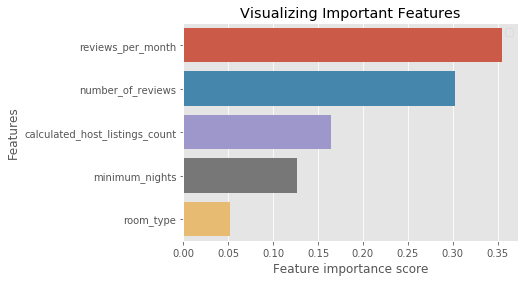

In [93]:
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.165927 to fit



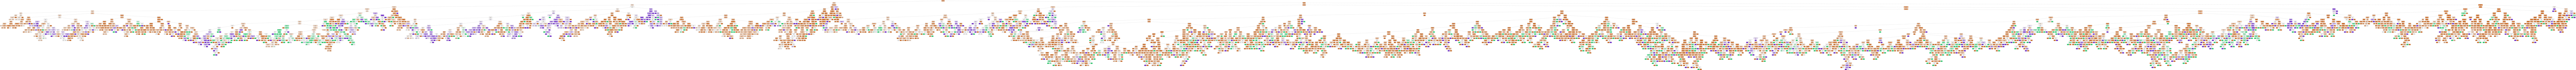

In [94]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(decision_tree, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df2020.columns[0:5], class_names=df2020['price_label'].unique())
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [95]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

0.7117167222840193
[[3797    0    7]
 [ 713    0   11]
 [ 824    0   42]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3804
           1       0.00      0.00      0.00       724
           2       0.70      0.05      0.09       866

    accuracy                           0.71      5394
   macro avg       0.47      0.35      0.31      5394
weighted avg       0.61      0.71      0.60      5394



/Users/dungnguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
feature=df2020.columns[0:5]
target=df2020['price_label'].unique()

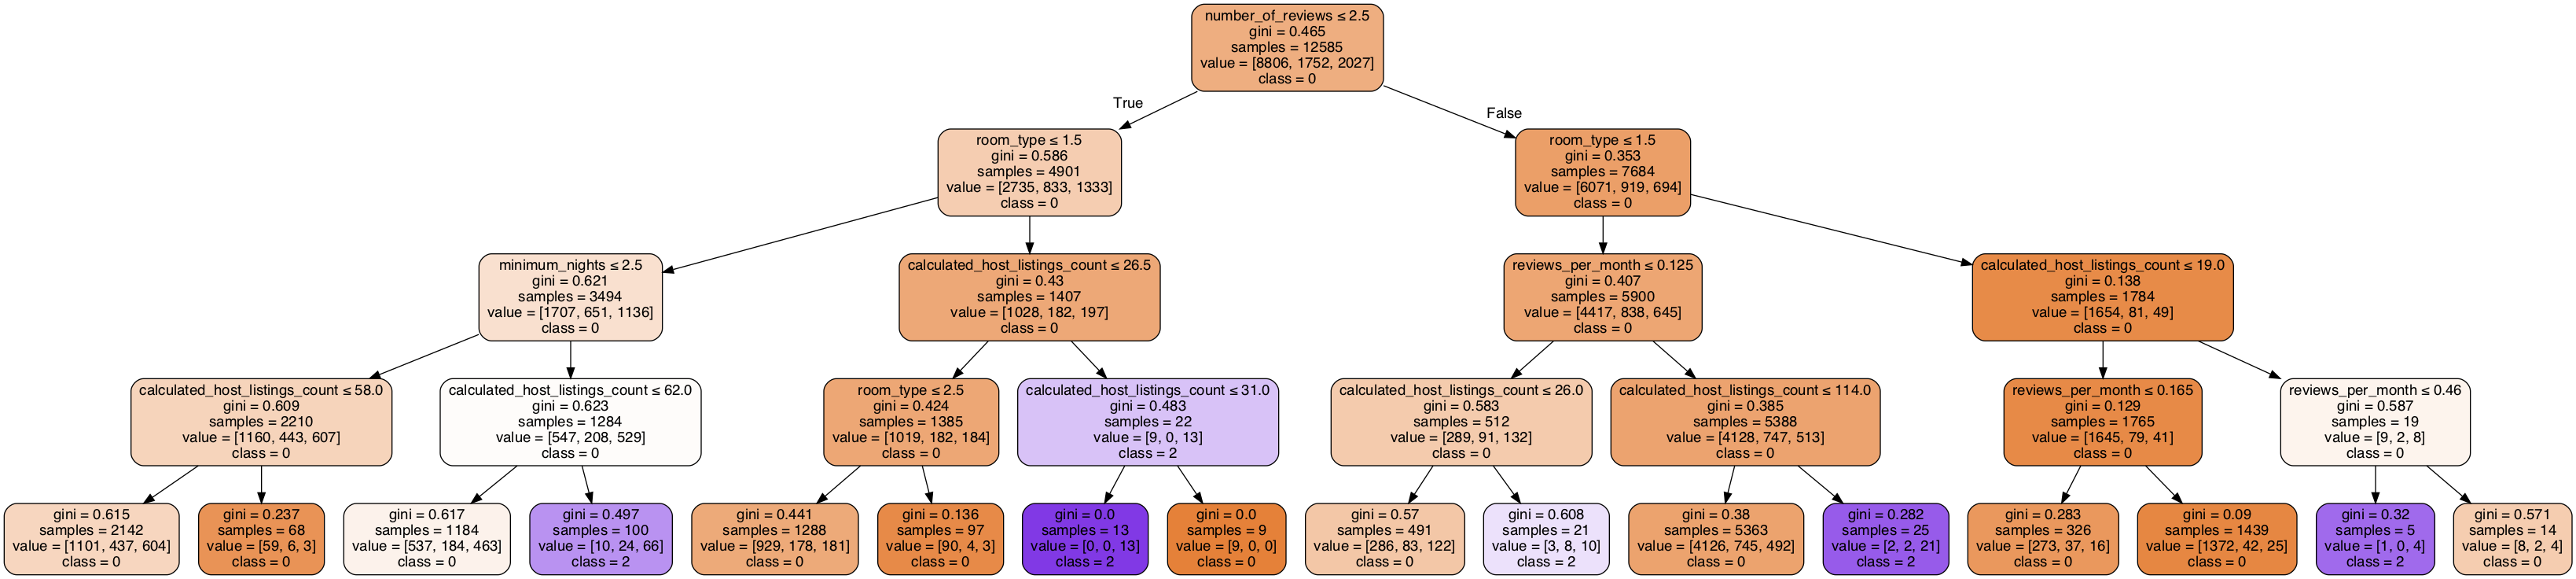

In [98]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df2020.columns[0:5], class_names=df2020['price_label'].unique())
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())